In [20]:
import os
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Define the path to the .nc file
file_path = r"D:\Data\iharp_training_dataset\Copernicus_ENA_training_data\19930101.nc"

In [22]:
# Open the .nc file
dataset = netCDF4.Dataset(file_path, mode="r")

In [23]:
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    cdm_data_type: Grid
    comment: Sea Surface Height measured by Altimetry and derived variables
    contact: http://climate.copernicus.eu/c3s-user-service-desk
    creator_email: http://climate.copernicus.eu/c3s-user-service-desk
    creator_name: Copernicus Climate Change Service (C3S)
    creator_url: http://climate.copernicus.eu
    date_created: 2021-07-09T08:53:57Z
    date_issued: 2021-07-09T08:53:57Z
    date_modified: 2021-07-09T08:53:57Z
    geospatial_lat_max: 89.875
    geospatial_lat_min: -89.875
    geospatial_lat_resolution: 0.25
    geospatial_lat_units: degrees_north
    geospatial_lon_max: 179.875
    geospatial_lon_min: -179.875
    geospatial_lon_resolution: 0.25
    geospatial_lon_units: degrees_east
    geospatial_vertical_max: 0.0
    geospatial_vertical_min: 0.0
    geospatial_vertical_positive: down
   

In [24]:
output_file_path = r"./19930101_info.txt"
# Save detailed information about the contents of the file to a text file
with open(output_file_path, "w") as f:
    f.write(str(dataset))

In [25]:
# Extract the 'sla' (Sea level Anomaly) variable
sla = dataset.variables["sla"][:]
print(sla)

[[[-- -- -- ... -0.0594 -0.062400000000000004 -0.066]
  [-- -- -- ... -0.051300000000000005 -0.0579 -0.0623]
  [-- -- -- ... -0.0506 -0.057800000000000004 -0.0625]
  ...
  [-- -- -- ... -0.007200000000000001 -0.015000000000000001
   -0.023100000000000002]
  [-- -- -- ... -0.0048000000000000004 -0.010100000000000001 -0.0176]
  [-- -- -- ... -0.0091 -0.009300000000000001 -0.0176]]]


In [26]:
# Calculate and print the max of all values stored in sla
max_sla = np.max(sla)
print(f"Maximum SLA: {max_sla}")

Maximum SLA: 0.7465


In [27]:
# Calculate and print the min of all values stored in sla
min_sla = np.min(sla)
print(f"Minimum SLA: {min_sla}")

Minimum SLA: -0.6945


In [28]:
# Calculate and print the average of all values stored in sla
average_sla = np.mean(sla)
print(f"Average SLA: {average_sla}")

Average SLA: -0.0027686967632027265


In [29]:
# Extract the latitude and longitude
latitude = dataset.variables["latitude"][:]
longitude = dataset.variables["longitude"][:]

In [30]:
# Close the dataset
dataset.close()

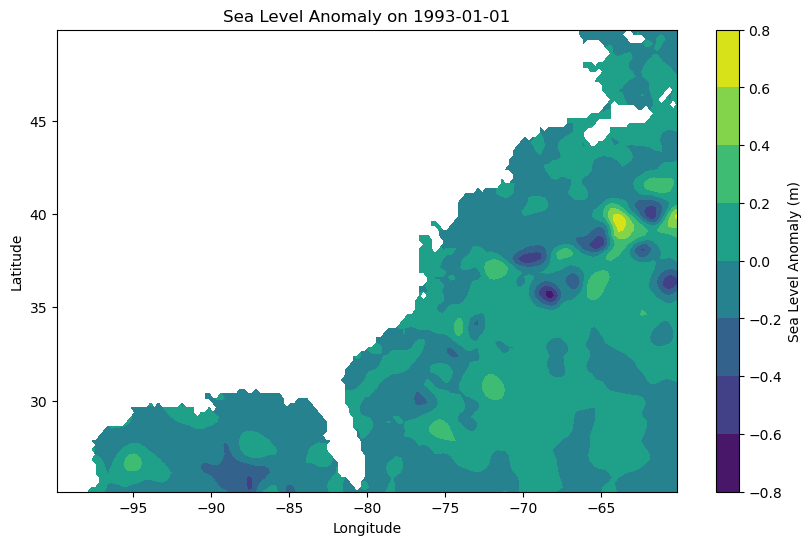

In [31]:
# Create a meshgrid for plotting
lon, lat = np.meshgrid(longitude, latitude)

# Plot the 'sla' variable
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, sla[0, :, :], cmap="viridis")
plt.colorbar(label="Sea Level Anomaly (m)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sea Level Anomaly on 1993-01-01")
plt.show()

In [32]:
# Define the directory containing the .nc files
directory = r"D:\Data\iharp_training_dataset\Copernicus_ENA_training_data"

In [33]:
# Initialize a list to store the results
results = []

In [34]:
# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        file_path = os.path.join(directory, filename)

        # Extract the date part from the filename and format it
        date_str = filename.split(".")[0]
        if len(date_str) == 8:
            formatted_date = f"{date_str[4:6]}-{date_str[6:8]}-{date_str[:4]}"

            # Open the .nc file
            dataset = netCDF4.Dataset(file_path, mode="r")

            # Extract the 'sla' variable
            sla = dataset.variables["sla"][:]

            # Calculate the average of all values stored in sla
            average_sla = np.mean(sla)

            # Determine the value for the additional columns
            value = 1 if average_sla >= 0 else 0

            # Append the result to the list
            results.append([formatted_date, average_sla] + [value] * 12)

            # Close the dataset
            dataset.close()

In [35]:
# Create a DataFrame from the results
columns = [
    "Date",
    "Average_SLA",
    "Atlantic City",
    "Baltimore",
    "Eastport",
    "Fort Pulaski",
    "Lewes",
    "New London",
    "Newport",
    "Portland",
    "Sandy Hook",
    "Sewells Point",
    "The Battery",
    "Washington",
]
results_df = pd.DataFrame(results, columns=columns)

In [36]:
# Remove the Average_SLA column
results_df = results_df.drop(columns=["Average_SLA"])

In [37]:
# Define the path to the output CSV file
output_csv_path = r"D:\Git\ML-challenge\baseline\demo_sla.csv"

In [38]:
# Save the DataFrame to a CSV file
results_df.to_csv(output_csv_path, index=False)